In [27]:
import os
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [30]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("carData.csv", header=None, names=headers)

data = data.sample(frac=1).reset_index(drop=True) # shuffle

In [31]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True)

In [32]:
size = len(data)
train_size = int(math.floor(size * 0.7))
train_data = data[:train_size]
test_data = data[train_size:]

In [33]:
d_tree = DecisionTreeClassifier(criterion="entropy")
d_tree.fit(train_data, train_data.index)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
d_tree.predict(test_data.iloc[:, 0:6])
score = d_tree.score(test_data, test_data.index)

print('Score with criterion = entropy: {0}'.format(score))

Score with criterion = entropy: 0.9691714836223507


In [35]:
d_tree = DecisionTreeClassifier(criterion="gini")
d_tree.fit(train_data, train_data.index)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
d_tree.predict(test_data.iloc[:, 0:6])
score = d_tree.score(test_data, test_data.index)

print('Score with criterion = gini: {0}'.format(score))

Score with criterion = gini: 0.9653179190751445


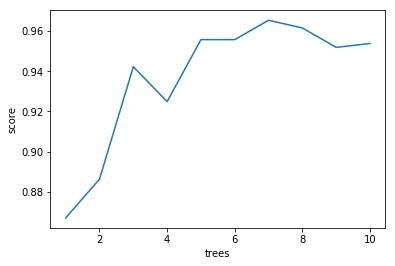

In [37]:
from sklearn.ensemble import RandomForestClassifier

def randomForestScores(limitTrees, train_data):
    scores = []
    for i in range(1, limitTrees):
        toFitTrainData = train_data
        d_tree = RandomForestClassifier(n_estimators=i, criterion='entropy')
        d_tree.fit(toFitTrainData, toFitTrainData.index)
        
        d_tree.predict(test_data.iloc[:, 0:6])
        score = d_tree.score(test_data, test_data.index)
        scores.append(score)
    return scores

scores = randomForestScores(11, train_data) # teste de 1 a 10 árvores

plt.plot(range(1, 11), scores)
plt.xlabel('trees')
plt.ylabel('score')
plt.show()